In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("./data"))

# Any results you write to the current directory are saved as output.

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

['winequality-red.csv']


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [4]:
data = pd.read_csv('./data/winequality-red.csv', sep=",")

In [5]:
#датасет не имеет пропущенных значений категориальных признаков
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


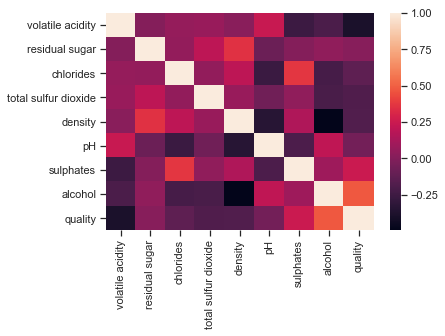

In [11]:
sns.heatmap(data.corr())

In [8]:
data = data.drop('free sulfur dioxide', axis=1)
data = data.drop('citric acid', axis=1)
data = data.drop('fixed acidity', axis=1)

In [12]:
quality = data['quality']
data = data.drop('quality', axis=1)
print(data.head())
print(quality.head())

   volatile acidity  residual sugar  chlorides  total sulfur dioxide  density  \
0              0.70             1.9      0.076                  34.0   0.9978   
1              0.88             2.6      0.098                  67.0   0.9968   
2              0.76             2.3      0.092                  54.0   0.9970   
3              0.28             1.9      0.075                  60.0   0.9980   
4              0.70             1.9      0.076                  34.0   0.9978   

     pH  sulphates  alcohol  
0  3.51       0.56      9.4  
1  3.20       0.68      9.8  
2  3.26       0.65      9.8  
3  3.16       0.58      9.8  
4  3.51       0.56      9.4  
0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64


In [13]:
x_train, x_test, y_train, y_test = train_test_split(
    data, quality, test_size=0.3, random_state=1)

**Random forest**

In [16]:
cls_rand = RandomForestClassifier()
cls_rand.fit(x_train, y_train)
target1_0 = cls_rand.predict(x_train)
target1_1 = cls_rand.predict(x_test)
print('accuracy')
accuracy_score(y_train, target1_0), accuracy_score(y_test, target1_1)

accuracy


C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.9865951742627346, 0.6604166666666667)

In [17]:
#доля правильных предсказаний
recall_score(y_test, target1_1, average='macro')

0.37367769106899545

In [18]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется среднее значение, дисбаланс классов учитывается 
# в виде веса классов (вес - количество истинных значений каждого класса).
precision_score(y_test, target1_1, average='weighted')

0.6285072335243742

In [19]:
#accuracy для каждого класса
print_accuracy_score_for_classes(y_test, target1_1)

Метка 	 Accuracy
3 	 0.0
4 	 0.0
5 	 0.8164251207729468
6 	 0.6307692307692307
7 	 0.46153846153846156
8 	 0.3333333333333333


In [20]:
classification_report(y_test, target1_1, 
                      target_names=quality.unique(), output_dict=True)

{5: {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2},
 6: {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 21},
 7: {'precision': 0.6733067729083665,
  'recall': 0.8164251207729468,
  'f1-score': 0.7379912663755459,
  'support': 207},
 4: {'precision': 0.6758241758241759,
  'recall': 0.6307692307692307,
  'f1-score': 0.6525198938992043,
  'support': 195},
 8: {'precision': 0.5581395348837209,
  'recall': 0.46153846153846156,
  'f1-score': 0.5052631578947369,
  'support': 52},
 3: {'precision': 0.5,
  'recall': 0.3333333333333333,
  'f1-score': 0.4,
  'support': 3},
 'micro avg': {'precision': 0.6604166666666667,
  'recall': 0.6604166666666667,
  'f1-score': 0.6604166666666667,
  'support': 480},
 'macro avg': {'precision': 0.40121174726937725,
  'recall': 0.37367769106899545,
  'f1-score': 0.38262905302824785,
  'support': 480},
 'weighted avg': {'precision': 0.6285072335243742,
  'recall': 0.6604166666666667,
  'f1-score': 0.6405817826262691,
  'support': 

**Gradient Boosting**

In [21]:
cls_gb = GradientBoostingClassifier()
cls_gb.fit(x_train, y_train)
target1_0_gb = cls_gb.predict(x_train)
target1_1_gb = cls_gb.predict(x_test)
print('accuracy')
print(accuracy_score(y_train, target1_0_gb), accuracy_score(y_test, target1_1_gb))
print('accuracy_score_for_classes')
print(print_accuracy_score_for_classes(y_test, target1_1_gb))
print('recall')
print(recall_score(y_test, target1_1_gb, average='macro'))
print('precission')
print(precision_score(y_test, target1_1_gb, average='weighted'))

accuracy
0.8918677390527256 0.6541666666666667
accuracy_score_for_classes
Метка 	 Accuracy
3 	 0.0
4 	 0.047619047619047616
5 	 0.7777777777777778
6 	 0.6461538461538462
7 	 0.4807692307692308
8 	 0.3333333333333333
None
recall
0.380942205942206
precission
0.6336907003970274


C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Grid Search**

Random forest

In [29]:
grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rand_cv=GridSearchCV(cls_rand,grid, cv=5)
rand_cv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
print("best estimator", rand_cv.best_estimator_)
print(rand_cv.best_score_)
cls_best_log = rand_cv.best_estimator_.fit(x_train,y_train)
target1_0_gsrf = cls_best_log.predict(x_train)
target1_1_gsrf = cls_best_log.predict(x_test)
print('accuracy')
print(accuracy_score(y_train, target1_0_gsrf), accuracy_score(y_test, target1_1_gsrf))
print('accuracy_score_for_classes')
print(print_accuracy_score_for_classes(y_test, target1_1_gsrf))
print('recall')
print(recall_score(y_test, target1_1_gsrf, average='macro'))
print('precission')
print(precision_score(y_test, target1_1_gsrf, average='weighted'))

best estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.6586237712243074
accuracy
0.8588025022341377 0.6645833333333333
accuracy_score_for_classes
Метка 	 Accuracy
3 	 0.0
4 	 0.0
5 	 0.7922705314009661
6 	 0.7025641025641025
7 	 0.34615384615384615
8 	 0.0
None
recall
0.30683141335315245
precission
0.6260333813879498


C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Gradient Boosting

In [32]:
grid = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    }
gb_cv=GridSearchCV(cls_gb,grid,cv=3)
gb_cv.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2], 'max_depth': [3, 5, 8], 'max_features': ['log2', 'sqrt'], 'criterion': ['friedman_mse', 'mae']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [33]:
print(gb_cv.best_estimator_)
cls_best_gb = gb_cv.best_estimator_.fit(x_train,y_train)
target1_0_gsgb = cls_best_gb.predict(x_train)
target1_1_gsgb = cls_best_gb.predict(x_test)
print('accuracy')
print(accuracy_score(y_train, target1_0_gsgb), accuracy_score(y_test, target1_1_gsgb))
print('accuracy_score_for_classes')
print(print_accuracy_score_for_classes(y_test, target1_1_gsgb))
print('recall')
print(recall_score(y_test, target1_1_gsgb, average='macro'))
print('precission')
print(precision_score(y_test, target1_1_gsgb, average='weighted'))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=5,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
accuracy
0.9526362823949955 0.68125
accuracy_score_for_classes
Метка 	 Accuracy
3 	 0.0
4 	 0.047619047619047616
5 	 0.782608695652174
6 	 0.7128205128205128
7 	 0.46153846153846156
8 	 0.3333333333333333
None
recall
0.3896533418272549
precission
0.6895336611736871


C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Сравнение accuracy до и после grid search (train, test)**

Random forest

Default parameters

0.9865951742627346, 0.6604166666666667

Метка 	 Accuracy
3 	 0.0
4 	 0.0
5 	 0.8164251207729468
6 	 0.6307692307692307
7 	 0.46153846153846156
8 	 0.3333333333333333

Grid search

0.8588025022341377 0.6645833333333333

Метка 	 Accuracy
3 	 0.0
4 	 0.0
5 	 0.7922705314009661
6 	 0.7025641025641025
7 	 0.34615384615384615
8 	 0.0

Gradient boosting

Default parameters

0.8918677390527256 0.6541666666666667

Метка 	 Accuracy
3 	 0.0
4 	 0.047619047619047616
5 	 0.7777777777777778
6 	 0.6461538461538462
7 	 0.4807692307692308
8 	 0.3333333333333333

Grid search

0.9526362823949955 0.68125

Метка 	 Accuracy
3 	 0.0
4 	 0.047619047619047616
5 	 0.782608695652174
6 	 0.7128205128205128
7 	 0.46153846153846156
8 	 0.3333333333333333